<center><strong>A Journey Into Math For Machine Learning</strong></center>
<center><strong>机器学习之数学之旅</strong></center>
<center><strong>之 逻辑回归(一, 二, 三)</strong></center>

今天的主题是**逻辑回归**, **逻辑回归**是一种被广泛使用的**统计模型**或**分类器**, 也是**深度学习**的基础, **逻辑回归**不同于**深度学习**的"**黑盒机制**", 我们完全可以搞明白它是怎样解决问题的. 而对于**深度学习**, 我们可以明确所有的计算原理, 但并不知道这些神经元是怎样协作从而解决问题的.   
今天讲的是**逻辑回归**中的**二项分类**问题, 我们要**从零推导**并用numpy实现逻辑回归, 为以后打好牢固的基础:      
**课程预览**:   
(一). 二项逻辑回归的直觉;   
(二). 逻辑回归的来历: $odds$和$probability$;      
(三). 逻辑回归的计算: $logit$函数和$sigmoid$函数及它们的特性;   
(四). 最大似然估计$(maximum \ likelihood \ estimation)$和损失函数;   
(五). 困惑度$(perplexity)$的定义;   
(六). 参数的获取: 梯度下降$(gradient \ descent)$法优化参数;      
(七). 添加正则项$(regularization)$和扩展内容;

**需要的组件**:   
numpy, scikit-learn(数据集), matplotlib(可视化), plotly(可视化)

__**(一). 二项逻辑回归的直觉**__
1. 二项逻辑回归是一个功能, 最终输出的是介于0到1之间的值, 为了解决类似"成功或失败","有或无"或"通过或拒绝"类似的"非是即否"的问题.   
2. 逻辑回归是一个把线性回归模型映射为概率的模型, 即把实数空间的输出$[-\infty,+\infty ]$映射到$(0,1)$, 从而获取概率.   
3. 下面我们通过画图的方式来直观的认识这种映射:    
我们首先定义一个**二元线性回归模型**: $\hat{y} = \theta_1 x_1 + \theta_2 x_2 + bias$,  其中$\hat{y}$的取值范围在$[-\infty,+\infty ]$, 让我们把它画出来.

In [8]:
# 导入numpy及可视化库plotly
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Image 
# 在jupyter notebook之内画图
init_notebook_mode(connected=True)

In [9]:
# 定义参数
theta_1 = 3
theta_2 = 2
bias = 0.8
# 获取网格
x_1 = y_1 = np.arange(-5, 5, 0.1)
x_1, y_1 = np.meshgrid(x_1, y_1)
# 进行二元线性回归模型计算
y_hat = \
(theta_1 * np.ravel(x_1) + 
 theta_2 * np.ravel(y_1) + bias).reshape(x_1.shape)

In [10]:
# 3d可视化
data = [go.Surface(z=y_hat)]
layout = go.Layout(title="Linear regression")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

上图可见, z轴代表的$\hat{y}$的取值范围是$[-\infty,+\infty ]$, 现在我们将$\hat{y}$代入$sigmoid$函数, 把$\hat{y}$映射为概率, 稍后会对这个函数做详细讲解: $\hat{p}=sigmoid(\hat{y}) \quad \hat{p} \in (0,1)$   
下图可见, z轴代表的$\hat{p}$的取值范围被映射到了$(0,1 )$

In [11]:
# 定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
p_hat = sigmoid(y_hat)
data = [go.Surface(z=p_hat)]
layout = go.Layout(title="Logistic regression")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

__**(二). $probability$和$odds$的定义**__   
1. $probability$指的是**发生的次数**/**总次数**, 如果抛硬币:    
$$p = \frac{正面向上的次数}{总次数}$$  p的取值范围为$[0, 1]$
2. $odds$则是一种比率, 指的是**发生的次数**/**没有发生的次数**:   
$$odds = \frac{正面向上次数}{反面向上次数}$$  odds的取值范围为$[0, +\infty)$   
3. 回顾**伯努利分布**: 如果$X$是**伯努利分布**中的随机变量, $X$的取值为$\{0,1\}$, 非$0$即$1$, 如抛硬币的正反面:   
则:  $P(X=1)=p \quad P(X=0)=1-p$   
代入$odds$:  $$odds={{p}\over{1-p}} \quad odds\in[0, +\infty)$$

__**(三). $logit$函数和$sigmoid$函数及它们的特性;**__
1. 我们对$odds$取$log$, 扩展$odds$的取值范围到实数空间$[-\infty, +\infty]$, 这就是$logit$函数:   
$$logit(p)=log_e(odds)=log_e(\frac{p}{1-p}) \quad p \in (0, 1) \quad logit(p) \in [-\infty, +\infty]$$
注意: 接下来我们会省略$log$的底$e$
2. 接下来, 我们用**线性回归模型**来表示$logit(p)$, 因为**线性回归模型**和$logit$函数的**输出**有着同样的取值范围:   
例如: $logit(p) = \theta_1 x_1 + \theta_2 x_2 + bias$   
下面我们来画一下$logit(p)$, 注意$p \in (0, 1)$, 当$p=0$或$p=1$的时候, $logit$函数属于未定义.

In [12]:
import matplotlib.pyplot as plt
def logit(p):
    return np.log(p/(1-p))
p = np.arange(1e-4, 1, 0.0001)
y = logit(p)
plt.plot(p, y , color='red', lw=2)
plt.axvline(x=0, lw=2, label="undefined")
plt.axvline(x=1, lw=2, label="undefined")
plt.xticks([i/100 for i in range(0, 125, 25)])
plt.grid()
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

3. 由$logit(p) = \theta_1 x_1 + \theta_2 x_2 + bias$得出$log(\frac{p}{1-p})=\theta_1 x_1 + \theta_2 x_2 + bias$,    
设$\theta_1 x_1 + \theta_2 x_2 + bias=z$, 得出:   
$log(\frac{p}{1-p})=z$, 等式两边取$e$:   
$$\frac{p}{1-p}=e^z$$
$$p=e^z(1-p)=e^z-e^zp$$
$$p(1+e^z)=e^z$$
$$p=\frac{e^z}{1+e^z}$$
分子分母同除$e^z$, 得出:
$$p=\frac{1}{1+e^{-z}} \quad p \in (0,1)$$
由上面推导, 我们得出了$sigmoid$函数, 终于可以把**线性回归模型**输出的的实数空间取值映射成为概率了.   
$$sigmoid(z)=\frac{1}{1+e^{-z}} \quad p \in (0,1)$$
我们来画一下$sigmoid$函数, 注意$sigmoid(z)$的取值范围:

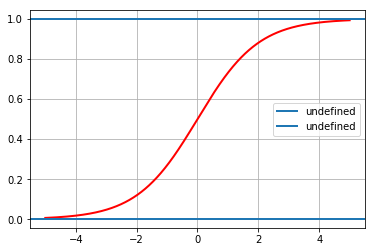

In [13]:
z = np.arange(-5, 5, 0.001)
y = [sigmoid(i) for i in z]
plt.plot(z, y, color='red', lw=2)
plt.axhline(y=0, lw=2, label="undefined")
plt.axhline(y=1, lw=2, label="undefined")
plt.grid()
plt.legend()
plt.show()

__**(四) 最大似然估计**__
1. 引入**假设函数**$h_{\theta}(X)$，设$\theta^TX$为**线性回归模型**:   
$\theta^TX$中, $\theta$和$X$均为**列向量**, 例如:
$\theta^T=
 \left[
 \begin{matrix}
   bias & \theta_1 & \theta_2 
  \end{matrix}
  \right]
\quad
X=
 \left[
 \begin{matrix}
   1  \\
   x_1  \\
   x_2 
  \end{matrix}
  \right]
$ 求矩阵点积, 得出:   
$$\theta^TX = bias * 1 + \theta_1 * x_1 + \theta_2 * x_2 = \theta_1x_1 + \theta_2x_2 + bias$$
设$\theta^TX = z$ 则有假设函数: 
$$h_\theta(X)=\frac{1}{1+e^{-z}}=P(Y=1 \mid X;\theta)$$
上式代表了$Y=1$的概率;   
$$P(Y=0 \mid X;\theta)=1-h_\theta(X)$$   
上式代表了$Y=0$的概率, 注意$Y \in \{0, 1\}$ 非$0$即$1$
2. 回顾**伯努利分布**(Bernoulli distribution):    
$$f(k;p)={\begin{cases}p&{\text{if }}k=1,\\q=1-p&{\text{if }}k=0.\end{cases}}$$
或$f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}$ 注意$f(k;p)$表示的是$k$为$0$或$1$的概率, 也就是$P(k)$
3. 如果你不知道**最大似然估计**是什么, 那么可以概括成一句话: **最大似然估计**的目的在于找到一个最符合数据的概率分布.   
例如下图中XX指的是数据点, 图中红色箭头长度的乘积就是似然函数的输出, 显然, 上半图的分布似然函数要比下半图的大, 所以上半图的分布更符合数据, 而**最大似然估计**就是找到一个最符合当前数据的分布.

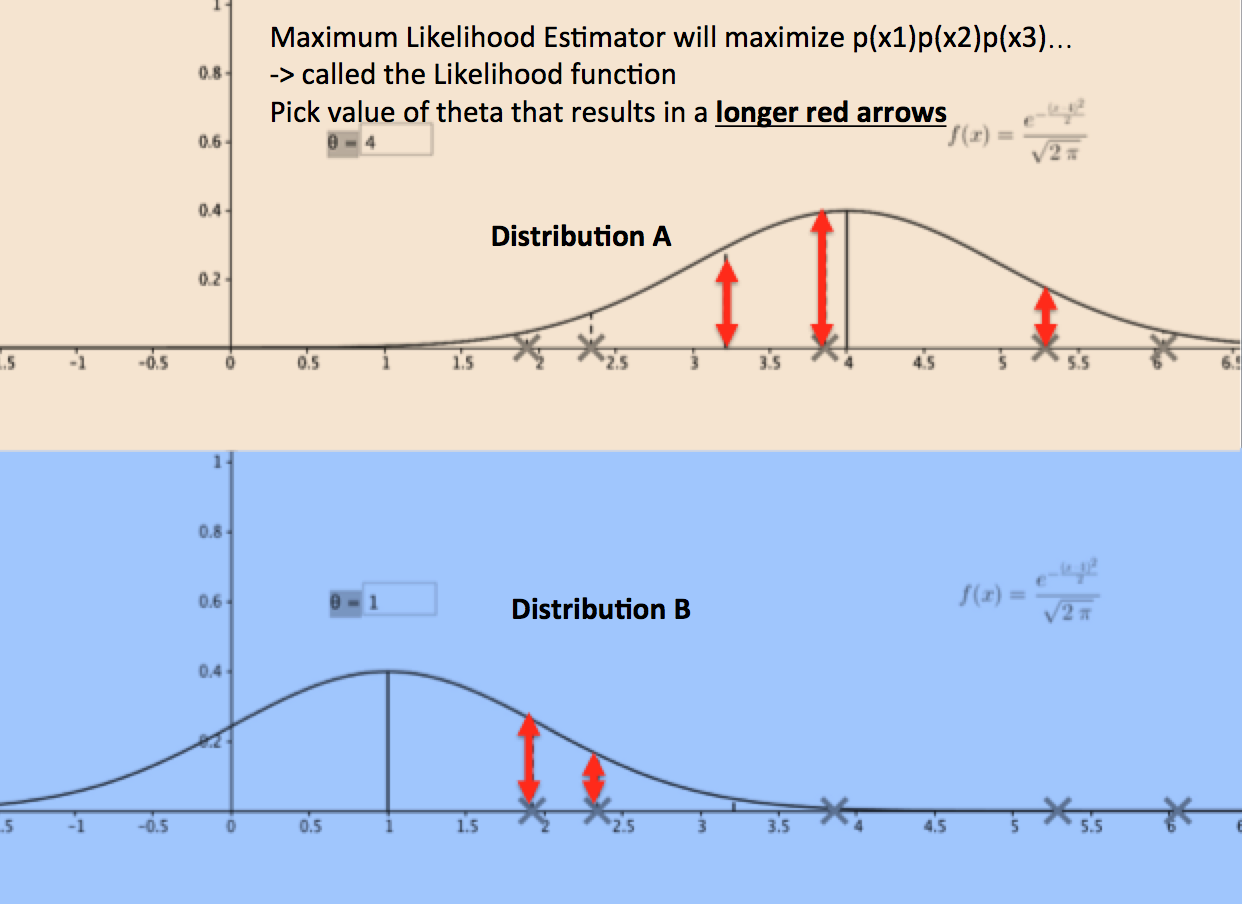

In [14]:
Image(filename='mle.png', width=600)

4. 定义**似然函数$(likelihood function)$**:
$${\begin{aligned}L(\theta \mid x)&=P(Y\mid X;\theta )\\&=\prod _{i}^{m}P(y_{i}\mid x_{i};\theta )\\&=\prod _{i}^{m}h_{\theta }(x_{i})^{y_{i}}(1-h_{\theta }(x_{i}))^{(1-y_{i})}\end{aligned}}$$
其中$i$为每个数据样本, 共有$m$个数据样本, **最大似然估计**的目的就是让上式的从输出值尽可能大;      
对上式取$log$, 以方便计算, 因为取$log$可以把乘积转换为加法，而且不影响我们的优化目标:
$$L(\theta \mid x) = \log(P({Y}\mid{h_{\theta }(X})) = \sum_{i=1}^{m} y_i \log(h_{\theta}({x}_i)) + (1-y_i) \log(1 - h_{\theta}({x}_i))$$
我们只要在式子前面加一个负号,即可把求最大转换为求最小, 设$h_{\theta}(X)=\hat{Y}$, 得出损失函数$J(\theta)$, 我们只要最小化这个函数, 就能通过求导来得出我们想要的$\theta$:   
$$J(\theta)=-\sum_{i}^{m} Y log(\hat{Y}) - (1-Y) log(1-\hat{Y})$$
顺便提一句, 在深度学习中说到的交叉熵, 和上式其实是一回事, 只不过上式是交叉上中的二项分类问题, 对于多项分类:   
$$CrossEntropy(Y, \hat{Y})=- \frac{1}{m}\sum_{i}^{m} \sum_{c}^{N_c} Y \log (\hat{Y}) $$
其中$c$为分类编号, $N_c$为所有的分类数量, 如果你对上式不理解, 没有关系, 在接下来的课程里面会涉及到.

(五). 困惑度$(perplexity)$的定义;    
通过理解困惑度, 可以让我们更加深入的理解交叉熵意义, 也可以轻易量化模型的性能.
1. 回顾交叉熵, 或我们在上面得出的损失函数, 我们假设只有一个数据样本, 则有:
$$CrossEntropy(Y, \hat{Y})=-\sum_{c}^{N_c} Y \log (\hat{Y}) $$
上式中$c$为分类编号, $N_c$为所有的分类数量,   
2. 因为$\sum_{c}^{N_c}Y$必然是$1$, 我们可以把$Y$提到求和符号外面,   
如果你不知道为什么$\sum_{c}^{N_c}Y=1$, 假设$Y$是一个**独热编码**$(onehot)$向量:   
$Y= \left[
 \begin{matrix}
   0 \quad (y_1) \\ 0 \quad (y_2) \\ 1 \quad (y_3) 
  \end{matrix}
  \right]$
$\hat{Y}= \left[
 \begin{matrix}
   \hat{y}_1 \\ \hat{y}_2 \\ \hat{y}_3 
  \end{matrix}
  \right]$
无论是单分类问题, 还是多分类问题, 属于的那个类别是$1$, 其余是$0$, 那他们的和肯定为$1$, 下面我们把$Y$提出来:   
$$J(\theta)=-\sum_{c}^{N_c} Y \log (\hat{Y})=1 * -\log (\hat{y}_c)$$
注意上式中, 我们假设$Y$是一个**独热编码**$(onehot)$向量, 则除了一个$1$以外, 其他是$0$的元素会把等式后面的$\log (\hat{Y})$中不属于$\hat{y}_c$的归零, 只剩下一个$\hat{y}_c$, 例如在上面的矩阵中, 只剩下$\hat{y}_3$.   
3. 假如我们的模型没有学到任何东西, 输入一个数据样本, 模型输出的每个分类的概率是均等的, 比如说一个分类器, 输入一张人的照片, 要输出这个人是男还是女, 结果模型输出的是男的概率$1/2$, 女的概率还是$1/2$, 等于没有作出任何判断, 那么在这种情况下$\hat{y}_c=\frac{1}{N_c}$, 我们将之代入原式, 得出:   
$$J(\theta)=-\log (\frac{1}{N_c})=-(log(1)-log(N_c))=log(N_c)$$
再对两边同时取$e$, 注意学习无效的情况下$e^{J(\theta)}$有可能会远大于$N_c$:   
$$无效学习的情况下: e^{J(\theta)} \geq N_c$$
这个的结果说明, 如果模型学到了东西, 那么$e^{J(\theta)}$的值应该**小于**$N_c$, 因为如果模型对正确的分类更有判断力的话, $\hat{y}_c$会**大于**$\frac{1}{N_c}$, 分母会变小, 结果会小于$N_c$.      
比如说我们现在有一个$10$分类问题, 就是一共有$10$个类别, 结果我们算出来 $e^{J(\theta)} \approx 6$, 意思就是说模型已经把$10$分类问题转换为了$6$分类问题了, 也就是说模型有了一定的判断能力, 而不是盲目胡乱分类了.
$$有效学习的情况下: e^{J(\theta)} < N_c$$

下面我们用代码实现一下上面讲到的内容:
首先我们从scikit-learn导入一个测试数据集, 是一个乳腺癌二项分类的数据集, 其中X内包含有10个特征值, Y含有两种分类, 非$0$即$1$.

In [15]:
import numpy as np
from sklearn.datasets import load_breast_cancer
# 载入特征值(features)和标记值(labels)
X, Y = load_breast_cancer(return_X_y=True)

In [16]:
X = X.T
Y = np.expand_dims(Y, axis=0)
print("X", X.shape)
print("Y", Y.shape)

X (30, 569)
Y (1, 569)


注意上面$X \in \mathbb{R}^{30*569} $, $Y \in \mathbb{R}^{1 * 569}$

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
# 初始化theta为全0
theta = np.zeros([30, 1])
# 初始化偏置为0
bias = np.zeros([1])

下面我们求出$\hat{Y}$:   
$$z = \theta^T  X$$
$$\hat{Y}=sigmoid(z)$$

In [19]:
def forward(X, theta, bias):
    z = np.dot(theta.T, X) + bias
    Y_hat = sigmoid(z)
    return Y_hat

求出交叉熵损失$J(\theta)$, 注意为了避免$\hat{Y}$里面含有非常接近于$0$的值, 而造成的$log$报错, 在$log$里面加一个很小的值:

In [20]:
def compute_loss(y, y_hat):
    e = 1e-8
    return - y * np.log(y_hat + e) - (1 - y) * np.log(1 - y_hat + e)

In [21]:
Y_hat = forward(X, theta, bias)
J_theta = compute_loss(Y, Y_hat)
J_theta = np.mean(J_theta)
J_theta

0.6931471605599454

上面我们已经得出了$J(\theta)$, 我们现在计算困惑度, 看看未训练的模型有没有一定的分类能力, 求$e^{J(\theta)}$:

In [22]:
np.exp(J_theta)

1.9999999600000007

由上面结果可见$e^{J(\theta)} \approx N_c$, 这表示模型无判断力, 不属于有效学习的状态.